In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
df= pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')

## Baseline Modelling

In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
numerics = ['int16', 'int32', 'int64','float64']
numeric = df.select_dtypes(include=numerics)
cat = df.select_dtypes(exclude=numerics)
cat.shape,numeric.shape

((1460, 43), (1460, 38))

In [7]:
n = numeric.columns
c = cat.columns
for col in n:
    df[col].fillna(df[col].median(),inplace=True)


In [8]:
train_df = numeric
train_df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [9]:
train_df.dropna(inplace=True,axis=1)

/opt/conda/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [10]:
X,y = train_df.drop(['SalePrice'],axis=1),train_df['SalePrice']

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=21)

In [15]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(max_depth=2, random_state=0)
random_forest.fit(x_train,y_train)
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression()

In [16]:
y_pred_rf = random_forest.predict(X_test)
y_pred_lr = linear_reg.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred_rf)**0.5

46741.98565149042

In [20]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred_lr)**0.5

48920.220115757176

## Predicting on test set

In [21]:
test_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [22]:
numerics = ['int16', 'int32', 'int64','float64']
test_numeric = test_df.select_dtypes(include=numerics)
cat = test_df.select_dtypes(exclude=numerics)
cat.shape,numeric.shape

((1459, 43), (1460, 35))

In [23]:
test_df = test_numeric
test_df.shape

(1459, 37)

In [24]:
n = test_numeric.columns
c = cat.columns
for col in n:
    test_df[col].fillna(test_df[col].median(),inplace=True)
    

In [25]:
test_df.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [26]:
list(set(test_df.columns) - set(train_df.columns))

['GarageYrBlt', 'MasVnrArea', 'LotFrontage']

In [27]:
train_df['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [28]:
len(train_df.columns)

35

In [29]:
test_df['MasVnrArea']=0 
test_df['LotFrontage']=0
test_df[ 'GarageYrBlt']=0

In [30]:
test_df.drop(['MasVnrArea', 'LotFrontage', 'GarageYrBlt'],axis=1,inplace=True)

In [32]:
y_final_rf = random_forest.predict(test_df)
y_final_lr = linear_reg.predict(test_df)


In [36]:
ids = test_df['Id']

In [37]:
submission_rf_baseline = pd.DataFrame({'Id':ids,'SalePrice':y_final_rf})
submission_lr_baseline = pd.DataFrame({'Id':ids,'SalePrice':y_final_lr})


In [38]:
submission_rf_baseline.to_csv("random_forest_baseline.csv",index=False)
submission_lr_baseline.to_csv("linear_reg_baseline.csv",index=False)

## Modelling with better preprocessing using Label Encoding and imputation

In [39]:
train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

In [40]:
#  here, some columns contain null value. So, drop it.

train.drop(['Id', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType'], axis=1, inplace=True)
test.drop(['Id','Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'MasVnrType'], axis=1, inplace=True)
train.shape,test.shape


((1460, 74), (1459, 73))

## Imputing missing values

In [41]:
train['LotFrontage'].fillna(method = 'bfill', inplace=True)
train['MasVnrArea'].fillna(0, inplace=True)
train['BsmtQual'].fillna(method = 'bfill', inplace=True)
train['BsmtCond'].fillna(method = 'bfill', inplace=True)
train['BsmtExposure'].fillna('No', inplace=True)
train['BsmtFinType1'].fillna(method = 'bfill', inplace=True)
train['BsmtFinType2'].fillna(method = 'bfill', inplace=True)
train['Electrical'].fillna(method = 'bfill', inplace=True)
train['GarageType'].fillna(method = 'bfill', inplace=True)
train['GarageYrBlt'].fillna(method = 'bfill', inplace=True)
train['GarageFinish'].fillna(method = 'bfill', inplace=True)
train['GarageQual'].fillna(method = 'bfill', inplace=True)
train['GarageCond'].fillna(method = 'bfill', inplace=True)



test['LotFrontage'].fillna(method = 'bfill', inplace=True)
test['MasVnrArea'].fillna(0, inplace=True)
test['BsmtQual'].fillna(method = 'bfill', inplace=True)
test['BsmtCond'].fillna(method = 'bfill', inplace=True)
test['BsmtExposure'].fillna('No', inplace=True)
test['BsmtFinType1'].fillna(method = 'bfill', inplace=True)
test['BsmtFinType2'].fillna(method = 'bfill', inplace=True)
test['Electrical'].fillna(method = 'bfill', inplace=True)
test['Electrical'].fillna(method = 'bfill', inplace=True)
test['BsmtFinSF1'].fillna(method = 'bfill', inplace=True)
test['BsmtFinSF2'].fillna(method = 'bfill', inplace=True)
test['BsmtUnfSF'].fillna(method = 'bfill', inplace=True)
test['TotalBsmtSF'].fillna(method = 'bfill', inplace=True)
test['BsmtFullBath'].fillna(method = 'bfill', inplace=True)
test['BsmtHalfBath'].fillna(method = 'bfill', inplace=True)
test['GarageYrBlt'].fillna(method = 'bfill', inplace=True)
test['GarageCars'].fillna(method = 'bfill', inplace=True)
test['GarageArea'].fillna(method = 'bfill', inplace=True)


In [42]:
from sklearn import preprocessing
print('MSZoning: ', len(train['MSZoning'].unique()))
print('Street: ', len(train['Street'].unique()))
print('LotShape: ', len(train['LotShape'].unique()))
print('LandContour: ', len(train['LandContour'].unique()))
print('Utilities: ', len(train['Utilities'].unique()))
print('LotConfig: ', len(train['LotConfig'].unique()))
print('LandSlope: ', len(train['LandSlope'].unique()))
print('Neighborhood: ', len(train['Neighborhood'].unique()))
print('Condition1: ', len(train['Condition1'].unique()))
print('Condition2: ', len(train['Condition2'].unique()))
print('BldgType: ', len(train['BldgType'].unique()))
print('HouseStyle: ', len(train['HouseStyle'].unique()))
print('RoofStyle: ', len(train['RoofStyle'].unique()))
print('RoofMatl: ', len(train['RoofMatl'].unique()))
print('Exterior1st: ', len(train['Exterior1st'].unique()))
print('Exterior2nd: ', len(train['Exterior2nd'].unique()))
print('ExterQual: ', len(train['ExterQual'].unique()))
print('ExterCond: ', len(train['ExterCond'].unique()))
print('Foundation: ', len(train['Foundation'].unique()))
print('BsmtQual: ', len(train['BsmtQual'].unique()))
print('BsmtCond: ', len(train['BsmtCond'].unique()))
print('BsmtExposure: ', len(train['BsmtExposure'].unique()))
print('BsmtFinType1: ', len(train['BsmtFinType1'].unique()))
print('BsmtFinType2: ', len(train['BsmtFinType2'].unique()))
print('Heating: ', len(train['Heating'].unique()))
print('HeatingQC: ', len(train['HeatingQC'].unique()))
print('CentralAir: ', len(train['CentralAir'].unique()))
print('Electrical: ', len(train['Electrical'].unique()))
print('KitchenQual: ', len(train['KitchenQual'].unique()))
print('Functional: ', len(train['Functional'].unique()))
print('GarageType: ', len(train['GarageType'].unique()))
print('GarageFinish: ', len(train['GarageFinish'].unique()))
print('GarageQual: ', len(train['GarageQual'].unique()))
print('GarageCond: ', len(train['GarageCond'].unique()))
print('PavedDrive: ', len(train['PavedDrive'].unique()))
print('SaleType: ', len(train['SaleType'].unique()))
print('SaleCondition: ', len(train['SaleCondition'].unique()))


MSZoning:  5
Street:  2
LotShape:  4
LandContour:  4
Utilities:  2
LotConfig:  5
LandSlope:  3
Neighborhood:  25
Condition1:  9
Condition2:  8
BldgType:  5
HouseStyle:  8
RoofStyle:  6
RoofMatl:  8
Exterior1st:  15
Exterior2nd:  16
ExterQual:  4
ExterCond:  5
Foundation:  6
BsmtQual:  4
BsmtCond:  4
BsmtExposure:  4
BsmtFinType1:  6
BsmtFinType2:  6
Heating:  6
HeatingQC:  5
CentralAir:  2
Electrical:  5
KitchenQual:  4
Functional:  7
GarageType:  6
GarageFinish:  3
GarageQual:  5
GarageCond:  5
PavedDrive:  3
SaleType:  9
SaleCondition:  6


In [43]:
## Applying label encoding to cat features


label_encoder = preprocessing.LabelEncoder()

train['MSZoning'] = label_encoder.fit_transform(train['MSZoning'])
train['Street'] = label_encoder.fit_transform(train['Street'])
train['LotShape'] = label_encoder.fit_transform(train['LotShape'])
train['LandContour'] = label_encoder.fit_transform(train['LandContour'])
train['Utilities'] = label_encoder.fit_transform(train['Utilities'])
train['LotConfig'] = label_encoder.fit_transform(train['LotConfig'])
train['LandSlope'] = label_encoder.fit_transform(train['LandSlope'])
train['Neighborhood'] = label_encoder.fit_transform(train['Neighborhood'])
train['Condition1'] = label_encoder.fit_transform(train['Condition1'])
train['Condition2'] = label_encoder.fit_transform(train['Condition2'])
train['BldgType'] = label_encoder.fit_transform(train['BldgType'])
train['HouseStyle'] = label_encoder.fit_transform(train['HouseStyle'])
train['RoofStyle'] = label_encoder.fit_transform(train['RoofStyle'])
train['RoofMatl'] = label_encoder.fit_transform(train['RoofMatl'])
train['Exterior1st'] = label_encoder.fit_transform(train['Exterior1st'])
train['Exterior2nd'] = label_encoder.fit_transform(train['Exterior2nd'])
train['ExterQual'] = label_encoder.fit_transform(train['ExterQual'])
train['ExterCond'] = label_encoder.fit_transform(train['ExterCond'])
train['Foundation'] = label_encoder.fit_transform(train['Foundation'])
train['BsmtQual'] = label_encoder.fit_transform(train['BsmtQual'])
train['BsmtCond'] = label_encoder.fit_transform(train['BsmtCond'])
train['BsmtExposure'] = label_encoder.fit_transform(train['BsmtExposure'])
train['BsmtFinType1'] = label_encoder.fit_transform(train['BsmtFinType1'])
train['BsmtFinType2'] = label_encoder.fit_transform(train['BsmtFinType2'])
train['Heating'] = label_encoder.fit_transform(train['Heating'])
train['HeatingQC'] = label_encoder.fit_transform(train['HeatingQC'])
train['CentralAir'] = label_encoder.fit_transform(train['CentralAir'])
train['Electrical'] = label_encoder.fit_transform(train['Electrical'])
train['KitchenQual'] = label_encoder.fit_transform(train['KitchenQual'])
train['Functional'] = label_encoder.fit_transform(train['Functional'])
train['GarageType'] = label_encoder.fit_transform(train['GarageType'])
train['GarageFinish'] = label_encoder.fit_transform(train['GarageFinish'])
train['GarageQual'] = label_encoder.fit_transform(train['GarageQual'])
train['GarageCond'] = label_encoder.fit_transform(train['GarageCond'])
train['PavedDrive'] = label_encoder.fit_transform(train['PavedDrive'])
train['SaleType'] = label_encoder.fit_transform(train['SaleType'])
train['SaleCondition'] = label_encoder.fit_transform(train['SaleCondition'])

train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


In [44]:
test['MSZoning'] = label_encoder.fit_transform(test['MSZoning'])
test['Street'] = label_encoder.fit_transform(test['Street'])
test['LotShape'] = label_encoder.fit_transform(test['LotShape'])
test['LandContour'] = label_encoder.fit_transform(test['LandContour'])
test['Utilities'] = label_encoder.fit_transform(test['Utilities'])
test['LotConfig'] = label_encoder.fit_transform(test['LotConfig'])
test['LandSlope'] = label_encoder.fit_transform(test['LandSlope'])
test['Neighborhood'] = label_encoder.fit_transform(test['Neighborhood'])
test['Condition1'] = label_encoder.fit_transform(test['Condition1'])
test['Condition2'] = label_encoder.fit_transform(test['Condition2'])
test['BldgType'] = label_encoder.fit_transform(test['BldgType'])
test['HouseStyle'] = label_encoder.fit_transform(test['HouseStyle'])
test['RoofStyle'] = label_encoder.fit_transform(test['RoofStyle'])
test['RoofMatl'] = label_encoder.fit_transform(test['RoofMatl'])
test['Exterior1st'] = label_encoder.fit_transform(test['Exterior1st'])
test['Exterior2nd'] = label_encoder.fit_transform(test['Exterior2nd'])
test['ExterQual'] = label_encoder.fit_transform(test['ExterQual'])
test['ExterCond'] = label_encoder.fit_transform(test['ExterCond'])
test['Foundation'] = label_encoder.fit_transform(test['Foundation'])
test['BsmtQual'] = label_encoder.fit_transform(test['BsmtQual'])
test['BsmtCond'] = label_encoder.fit_transform(test['BsmtCond'])
test['BsmtExposure'] = label_encoder.fit_transform(test['BsmtExposure'])
test['BsmtFinType1'] = label_encoder.fit_transform(test['BsmtFinType1'])
test['BsmtFinType2'] = label_encoder.fit_transform(test['BsmtFinType2'])
test['Heating'] = label_encoder.fit_transform(test['Heating'])
test['HeatingQC'] = label_encoder.fit_transform(test['HeatingQC'])
test['CentralAir'] = label_encoder.fit_transform(test['CentralAir'])
test['Electrical'] = label_encoder.fit_transform(test['Electrical'])
test['KitchenQual'] = label_encoder.fit_transform(test['KitchenQual'])
test['Functional'] = label_encoder.fit_transform(test['Functional'])
test['GarageType'] = label_encoder.fit_transform(test['GarageType'])
test['GarageFinish'] = label_encoder.fit_transform(test['GarageFinish'])
test['GarageQual'] = label_encoder.fit_transform(test['GarageQual'])
test['GarageCond'] = label_encoder.fit_transform(test['GarageCond'])
test['PavedDrive'] = label_encoder.fit_transform(test['PavedDrive'])
test['SaleType'] = label_encoder.fit_transform(test['SaleType'])
test['SaleCondition'] = label_encoder.fit_transform(test['SaleCondition'])

test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,2010,8,4
1,20,3,81.0,14267,1,0,3,0,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,0,3,0,4,0,...,34,0,0,0,0,0,3,2010,8,4
3,60,3,78.0,9978,1,0,3,0,4,0,...,36,0,0,0,0,0,6,2010,8,4
4,120,3,43.0,5005,1,0,1,0,4,0,...,82,0,0,144,0,0,1,2010,8,4


In [ ]:
## Removing correlated columns
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']


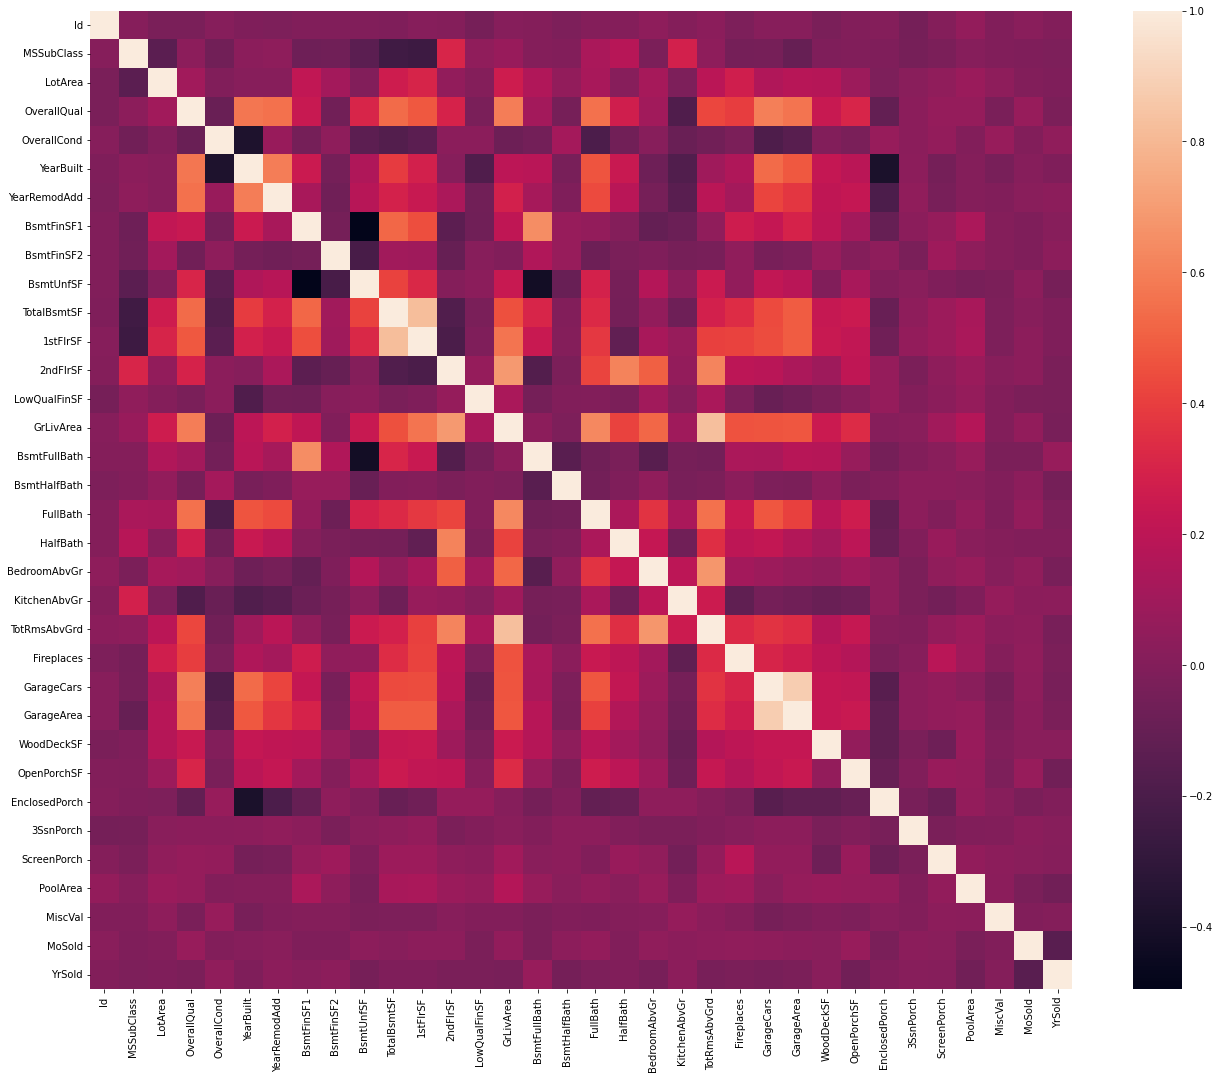

In [46]:

# now, plot the dataset

plt.figure(figsize=(22,18))
ax = sns.heatmap(X.corr())
plt.show()

In [47]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [49]:
corr_features = correlation(X, 0.6) # if it is 0.6 then drop such columns and keep only one
corr_features

{'1stFlrSF',
 'BsmtFullBath',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'HalfBath',
 'TotRmsAbvGrd'}

In [50]:
X_corr = X.drop(corr_features,axis=1)
X_corr

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,61,0,0,0,0,0,2,2008
1,2,20,9600,6,8,1976,1976,978,0,284,...,1,298,0,0,0,0,0,0,5,2007
2,3,60,11250,7,5,2001,2002,486,0,434,...,1,0,42,0,0,0,0,0,9,2008
3,4,70,9550,7,5,1915,1970,216,0,540,...,1,0,35,272,0,0,0,0,2,2006
4,5,60,14260,8,5,2000,2000,655,0,490,...,1,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0,0,953,...,1,0,40,0,0,0,0,0,8,2007
1456,1457,20,13175,6,6,1978,1988,790,163,589,...,2,349,0,0,0,0,0,0,2,2010
1457,1458,70,9042,7,9,1941,2006,275,0,877,...,2,0,60,0,0,0,0,2500,5,2010
1458,1459,20,9717,5,6,1950,1996,49,1029,0,...,0,366,0,112,0,0,0,0,4,2010


In [52]:
x_train, x_test,y_train,y_test = train_test_split(X_corr,y,test_size =0.1)
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (1314, 26)
x_test:  (146, 26)
y_train:  (1314,)
y_test:  (146,)


In [54]:
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(random_state=0)
random_forest.fit(x_train,y_train)
linear_reg = linear_model.LinearRegression()
linear_reg.fit(x_train,y_train)

y_pred_rf = random_forest.predict(x_test)
y_pred_lr = linear_reg.predict(x_test)

from sklearn.metrics import mean_squared_error
rmse_rf = mean_squared_error(y_test,y_pred_rf)**0.5
rmse_lr = mean_squared_error(y_test,y_pred_lr)**0.5
print(f'RMSE RF = {rmse_rf}\nRMSE_LR = {rmse_lr}')

RMSE RF = 30609.33101310109
RMSE_LR = 31142.956835689012


In [55]:
test_data = test.drop(corr_features, axis=1)
test_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,2010,8,4
1,20,3,81.0,14267,1,0,3,0,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,0,3,0,4,0,...,34,0,0,0,0,0,3,2010,8,4
3,60,3,78.0,9978,1,0,3,0,4,0,...,36,0,0,0,0,0,6,2010,8,4
4,120,3,43.0,5005,1,0,1,0,4,0,...,82,0,0,144,0,0,1,2010,8,4


In [57]:
final = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

pred = random_forest.predict(test_data)
pred = pd.DataFrame(pred,columns=['SalePrice'])
sub_rf = pd.concat([final['Id'],pred],axis=1)

sub_rf.set_index('Id',inplace=True)
sub_rf.to_csv("rf_improved.csv")

pred = linear_reg.predict(test_data)
pred = pd.DataFrame(pred,columns=['SalePrice'])
sub_lr = pd.concat([final['Id'],pred],axis=1)

sub_lr.set_index('Id',inplace=True)
sub_lr.to_csv("lr_improved.csv")

In [ ]:

"""

BASE_RF = 46741
BASE_LR = 48920
RMSE RF = 30609.33101310109
RMSE_LR = 31142.956835689012


linear_reg_baseline.csv
Score: 0.54925
    
random_forest_baseline.csv
Score: 0.26094

lr_improved.csv
Score: 0.39576


rf_improved.csv
Score: 0.26114

"""

## Conclusion
- Baseline model has very large rmse of around 46741 and 48920 for random forest and linear regression respectively. Next when instead of dropping na values imputed it and all he categorical variables were label encoded rmse decreased from 40k to 30k and gave a leaderboard rank of 3581